In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/train/"
test_path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/test/"

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,MaxPool2D,Conv2D,Dropout,Flatten
from keras.models import Sequential
from tensorflow.keras.applications import vgg16

In [4]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input ,
                                    zoom_range= 0.2, horizontal_flip= True, 
                                    shear_range= 0.2 ,
                                    rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 1726 images belonging to 2 classes.


In [5]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input,
                                   rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , 
                                          target_size=(224,224), shuffle= False)

Found 433 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.models import Model

In [7]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) 
# include_top will consider the new weights

2022-05-23 15:48:57.377039: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:48:57.415212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:48:57.415561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 15:48:57.416855: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [12]:
# implementing early stopping and model check point 

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", 
                     verbose=1, save_best_only= True)

In [13]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 30, 
                           validation_data= test , 
                           callbacks=[es,mc])


Epoch 1/30


2022-05-23 15:49:01.246288: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8202
2022-05-23 15:49:03.929472: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-23 15:49:03.929506: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-23 15:49:03.929515: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

10/10 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.7406
Epoch 1: val_accuracy improved from -inf to 0.88684, saving model to bestmodel.h5
10/10 [==============================] - 31s 2s/step - loss: 0.6617 - accuracy: 0.7406 - val_loss: 0.2301 - val_accuracy: 0.8868
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9688
Epoch 2: val_accuracy improved from 0.88684 to 0.98614, saving model to bestmodel.h5
10/10 [==============================] - 19s 2s/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 0.0556 - val_accuracy: 0.9861
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9969
Epoch 3: val_accuracy improved from 0.98614 to 0.98845, saving model to bestmodel.h5
10/10 [==============================] - 18s 2s/step - loss: 0.0225 - accuracy: 0.9969 - val_loss: 0.0473 - val_accuracy: 0.9885
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9

In [14]:
## load only the best model 
from keras.models import load_model
model = load_model("bestmodel.h5")

In [15]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
epochs=range(1,len(h['accuracy'])+1)
epochs

range(1, 6)

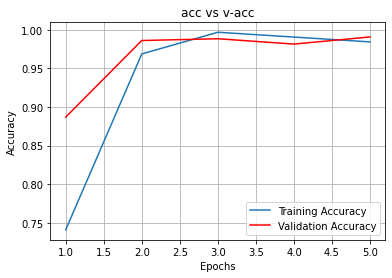

In [17]:
epochs=range(1,len(h['accuracy'])+1)
plt.plot(epochs,h['accuracy'],label="Training Accuracy")
plt.plot(epochs,h['val_accuracy'], c = "red",label="Validation Accuracy")
plt.title("acc vs v-acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

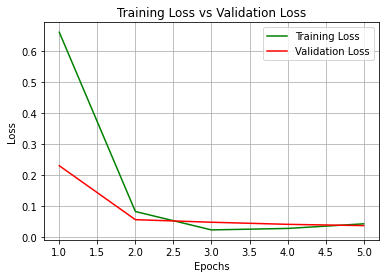

In [18]:
plt.plot(epochs,h['loss'],c='green',label="Training Loss")
plt.plot(epochs,h['val_loss'],c='red',label="Validation Loss")
plt.title("Training Loss vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# checking out the accurscy of our model 

acc = model.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc} %")

The accuracy of your model is = 0.9838337302207947 %


In [20]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The chances of image being Covid is : 0.23296126164495945 percent

The chances of image being Normal is : 99.64984655380249 percent


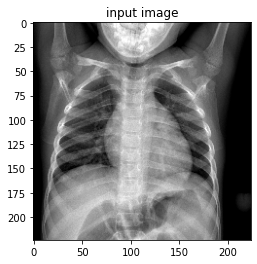

In [21]:
path="/home/bibek/Desktop/Project_Sem_8/Projects/Data/train/NORMAL/NORMAL(100).jpg"

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

The chances of image being Covid is : 95.27100324630737 percent

The chances of image being Normal is : 2.1322501823306084 percent


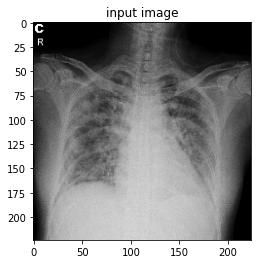

In [22]:
path="/home/bibek/Downloads/Small_Size_Data/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg"

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

In [23]:
import tensorflow as tf

In [24]:
# this function is udes to generate the heat map of aan image


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [25]:
import matplotlib.cm as cm
from IPython.display import Image, display

In [26]:
# put the heatmap to our image to understand the area of interest

def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded 
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [27]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  img = get_img_array(path)

  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing the covid spot")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

The chances of image being Covid is : 95.27100324630737 %
The chances of image being Normal is : 2.1322501823306084 %

image with heatmap representing the covid spot


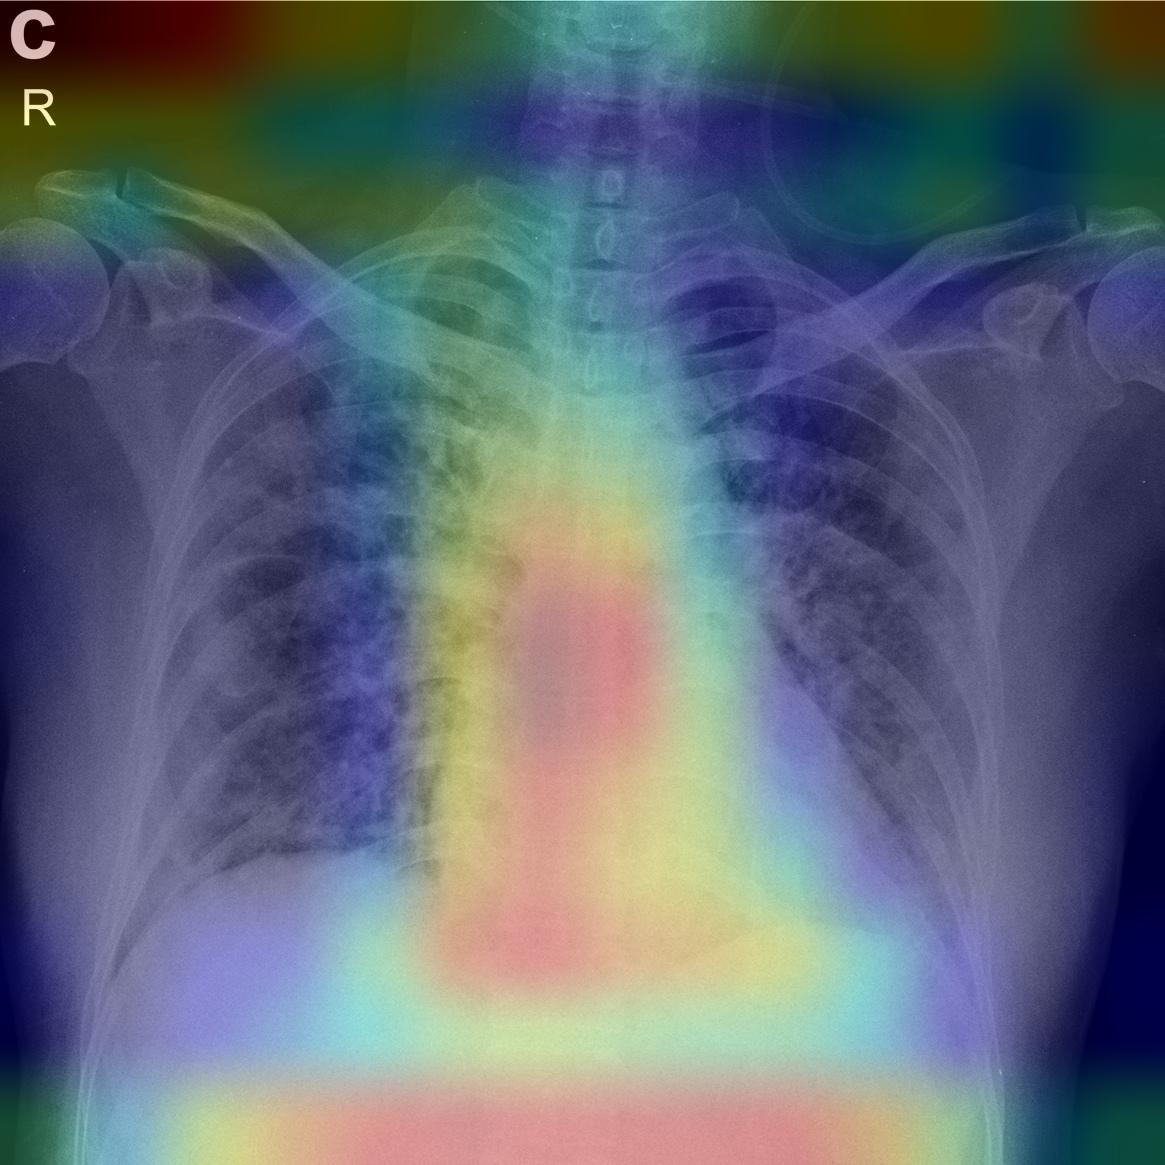


the original input image



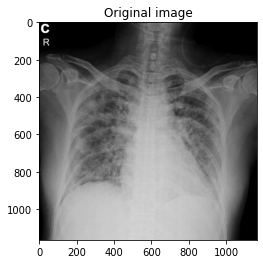

In [28]:
#predictions
# provide the path of any image from google or any other scource 
# the path is already defigned above , but you can also provide the path here to avoid scrolling up 

# for covid image : 
path="/home/bibek/Downloads/Small_Size_Data/dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg"

image_prediction_and_visualization(path)